<a href="https://colab.research.google.com/github/Logesh-Dev-95/SentimentAnalysis1/blob/main/SentimentAnalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('IMDB Dataset.csv')

print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [2]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [3]:
df.isnull().sum()

,0
review,0
sentiment,0


In [4]:
df['review_length'] = df['review'].apply(len)

In [5]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


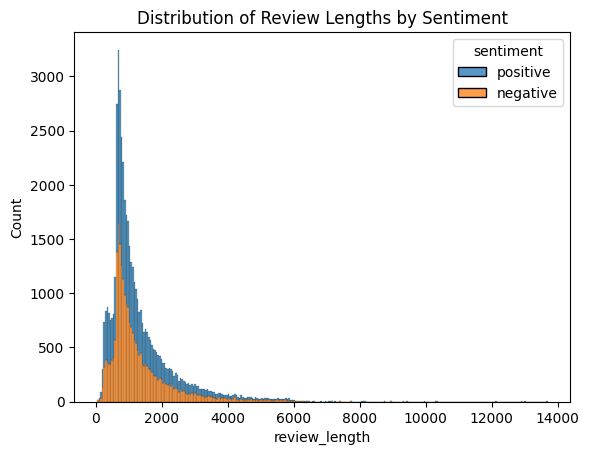

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x='review_length', hue='sentiment', multiple='stack')
plt.title('Distribution of Review Lengths by Sentiment')
plt.show()

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text, method='lemmatize'):

    text = re.sub(r'<br />', ' ', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    text = text.lower()

    tokens = nltk.word_tokenize(text)

    processed_tokens = []
    for token in tokens:

        if token not in stop_words:

            if method == 'lemmatize':
                processed_tokens.append(lemmatizer.lemmatize(token))
            else:
                processed_tokens.append(stemmer.stem(token))

    return ' '.join(processed_tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
df['clean_review_lem'] = df['review'].apply(lambda x: preprocess_text(x, method='lemmatize'))

In [16]:
df['clean_review_stem'] = df['review'].apply(lambda x: preprocess_text(x, method='stem'))

In [17]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_review_lem'])
y = df['sentiment'].map({'positive': 1, 'negative': 0})


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [22]:
my_review = "The movie is good."

processed_review = preprocess_text(my_review, method='lemmatize')
print(f"Original Review: {my_review}")
print(f"Processed Review: {processed_review}\n")

processed_review_vectorized = tfidf_vectorizer.transform([processed_review])

prediction = lr_model.predict(processed_review_vectorized)

sentiment_label = "Positive" if prediction[0] == 1 else "Negative"

print(f"Prediction: {prediction[0]}")
print(f"Sentiment: {sentiment_label}")

Original Review: The movie is bad.
Processed Review: movie bad

Prediction: 0
Sentiment: Negative
